# KG testing

In [1]:
# Import necessary libraries
import pandas as pd
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import re

# Load spaCy model for NLP tasks
nlp = spacy.load('en_core_web_sm')


In [2]:
# Function to load and clean data
def load_data(file_path):
    """ Load definitions from a file """
    with open(file_path, 'r') as file:
        data = file.read()

    definitions = [item.strip() for item in data.split('\n') if item.strip()]
    return pd.DataFrame(definitions, columns=['definition'])

# Data cleaning function
def clean_definitions(definitions):
    """ Clean the business definitions """
    cleaned_definitions = []
    for definition in definitions:
        cleaned_definition = definition.strip().replace('\n', ' ').replace('&lt;', '<').replace('&gt;', '>')
        cleaned_definition = re.sub(r'\s+', ' ', cleaned_definition)
        cleaned_definition = cleaned_definition.lower()
        cleaned_definitions.append(cleaned_definition)
    return cleaned_definitions


In [3]:
# Triple extraction function
def get_relation(sent):
    """ Extract subject, relation, and object based on pattern 'is' """
    if ' is ' in sent:
        parts = sent.split(' is ')
        subject = parts[0].strip()
        object_ = parts[1].strip()
        relation = 'is'
        return (subject, relation, object_)
    else:
        return ("", "", "")


In [4]:
# Load and clean the data
file_path = 'ctx_pd.txt'
df = load_data(file_path)
df['definition'] = clean_definitions(df['definition'])

# Extract triples (subject, relation, object)
for definition in tqdm(df['definition'], desc='Extracting triples'):
    triple = get_relation(definition)
    if all(triple):
        triples.append(triple)

# Display first 5 triples
print("Extracted Triples:")
for t in triples[:5]:
    print(t)

# Create a DataFrame for triples
kg_df = pd.DataFrame(triples, columns=['source', 'edge', 'target'])

# Build the knowledge graph using NetworkX
G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())


Extracting triples: 100%|██████████| 240/240 [00:00<00:00, 296766.79it/s]

Extracted Triples:
('academic accreditation', 'is', 'approval process by an accrediting authority of a learning program leading to an aqf qualification using the quality assurance standards for the relevant education and training sector or the evaluation of a course of study (either by teqsa or by a self-accrediting provider such as a university) against course requirements specified in the higher education standards framework. created by aqf (australian qualifications framework)')
('"accepted offer', 'is', 'acceptance')
('"""admission', 'is', "student's admission into a program, covering the point of admission and record of ongoing status of their admission. navigate: unit id")
('"advanced diploma', 'is', 'the purpose of the advanced diploma qualification type')
('alumni', 'is', 'a graduate or former student. when a student completes their studies they become an alumni of the institution. created by australian government dictionary')


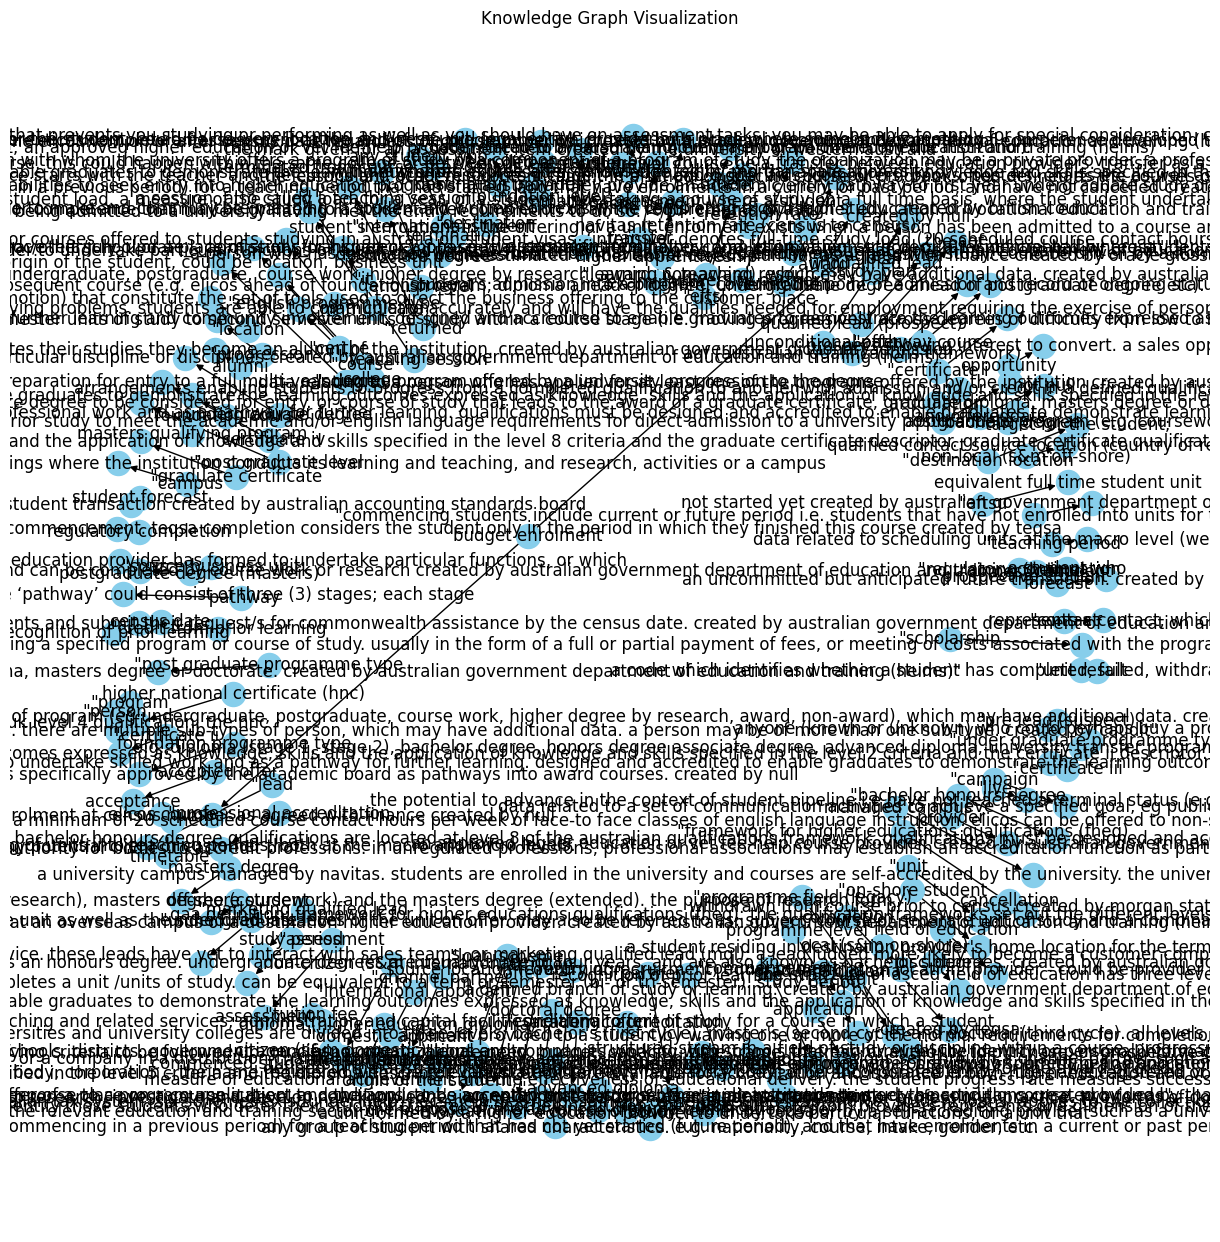

In [5]:
# Visualize the knowledge graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.title("Knowledge Graph Visualization")
plt.show()

In [6]:
# Query function for knowledge graph
def query_kg(subject, relation):
    """ Query the knowledge graph for a specific subject and relation """
    query_df = kg_df[(kg_df['source'] == subject) & (kg_df['edge'] == relation)]
    if query_df.empty:
        return "No information available"
    else:
        return query_df['target'].values

# Test the query function
test_subject = "bachelor degree"
test_relation = "is"
print(f"Querying the knowledge graph for '{test_subject} {test_relation} ...':")
print(query_kg(test_subject, test_relation))

Querying the knowledge graph for 'bachelor degree is ...':
No information available
